In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [4]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


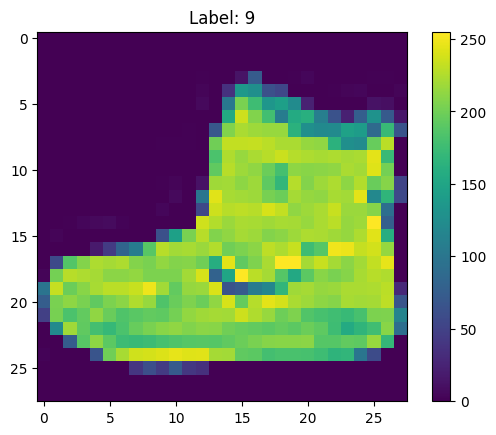

In [5]:
index = 0

plt.imshow(training_images[index])
plt.colorbar()
plt.title(f'Label: {training_labels[index]}')
plt.show()

In [6]:
# Normalize the pixel values of the train and test images
training_images = training_images / 255.0
test_images = test_images / 255.0 

In [7]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [8]:
model.compile(
    optimizer = tf.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [9]:
model.fit(
    training_images,
    training_labels,
    epochs=5
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7706 - loss: 0.6522
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8610 - loss: 0.3897
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8729 - loss: 0.3444
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8837 - loss: 0.3141
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8879 - loss: 0.2979


In [10]:
# Evaluate the model on unseen data
loss, accuracy = model.evaluate(
    test_images,
    test_labels
)

print(f'Loss: {loss:.4f}\nAccuracy: {accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8747 - loss: 0.3410
Loss: 0.3447
Accuracy: 0.8736


In [11]:
classifications = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Predicted: 9 with 96.71% certainty


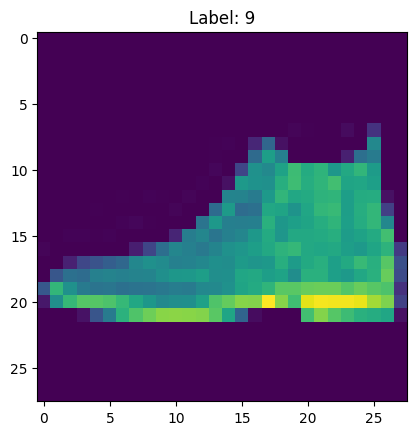

In [12]:
index = 0

real_label = test_labels[index]
predicted_label = classifications[index].argmax()
predicted_probability = classifications[index][predicted_label]

print(f'Predicted: {predicted_label} with {predicted_probability*100:.2f}% certainty')

plt.imshow(test_images[index])
plt.title(f'Label: {real_label}')
plt.show()